<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/13_Feature_Engineering_for_Machine_Learning_in_Python/01_Creating_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4. Validating and Inspecting Time Series Models


In [71]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/11_Preprocessing_for_Machine_Learning_in_Python/dataset/ufo_updated.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ufo = pd.read_csv(url)
display(ufo.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/height_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
height_df = pd.read_csv(url)
display(height_df.head())

,date,city,state,country,type,seconds,length_of_time,desc,recorded,lat,...,light,other,oval,rectangle,sphere,teardrop,triangle,unknown,month,year
0,2002-11-21 05:45:00,clemmons,nc,us,triangle,300.0,about 5 minutes,It was a large&#44 triangular shaped flying ob...,12/23/2002,36.021389,...,0,0,0,0,0,0,1,0,11,2002
1,2012-06-16 23:00:00,san diego,ca,us,light,600.0,10 minutes,Dancing lights that would fly around and then ...,7/4/2012,32.715278,...,1,0,0,0,0,0,0,0,6,2012
2,2013-06-09 00:00:00,oakville (canada),on,ca,light,120.0,2 minutes,Brilliant orange light or chinese lantern at o...,7/3/2013,43.433333,...,1,0,0,0,0,0,0,0,6,2013
3,2013-04-26 23:27:00,lacey,wa,us,light,120.0,2 minutes,Bright red light moving north to north west fr...,5/15/2013,47.034444,...,1,0,0,0,0,0,0,0,4,2013
4,2013-09-13 20:30:00,ben avon,pa,us,sphere,300.0,5 minutes,North-east moving south-west. First 7 or so li...,9/30/2013,40.508056,...,0,0,0,0,1,0,0,0,9,2013


,weight_kg,height_1,height_2,height_3,height
0,81.5,1.78,1.80,1.80,1.793333
1,72.6,1.70,1.70,1.69,1.696667
2,92.9,1.74,1.75,1.73,1.740000
3,79.4,1.66,1.68,1.67,1.670000
4,94.6,1.91,1.93,1.90,1.913333


### Creating Feature From the past

**Creating time-shifted features**  
In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.

,date,EBAY,NVDA,YHOO
0,2010-01-04,23.900000,18.490000,17.100000
1,2010-01-05,23.650000,18.760000,17.230000
2,2010-01-06,23.500000,18.879999,17.170000
3,2010-01-07,23.229998,18.510000,16.700001
4,2010-01-08,23.509999,18.549999,16.700001


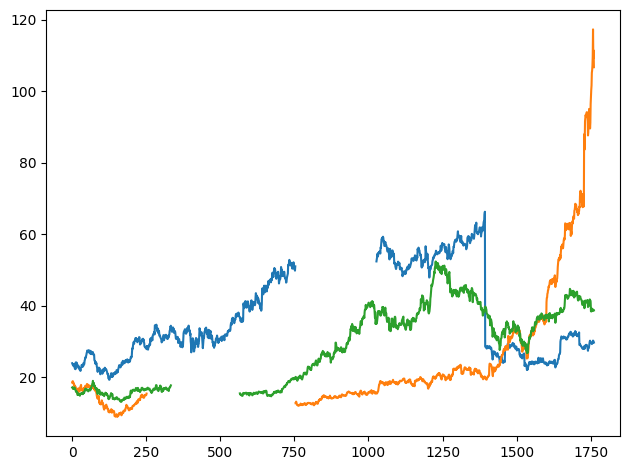

date      0
EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [72]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/12_Machine_Learning_for_Time_Series_Data_in_Python/dataset/prices_raw.csv"
# Read the CSV file
prices = pd.read_csv(url)
display(prices.head())

# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices["date"] = pd.to_datetime(prices["date"])
prices.set_index("date", inplace=True)

In [74]:



# Define function with iloc
def percent_change(series):
    previous_values = series.iloc[:-1]
    last_value = series.iloc[-1]
    return (last_value - np.mean(previous_values)) / np.mean(previous_values)

# Assuming 'prices' is a Pandas Series with DateTime index
prices_perc = prices.rolling(20).aggregate(percent_change)

In [75]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.isocalendar().week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                EBAY      NVDA      YHOO  day_of_week  week_of_year  \
date                                                                  
2010-01-04       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN            4             1   
...              ...       ...       ...          ...           ...   
2016-12-23  0.024842  0.147720 -0.038006            4            51   
2016-12-27  0.038030  0.216063 -0.027985            1            52   
2016-12-28  0.026925  0.117737 -0.029311            2            52   
2016-12-29  0.021850  0.129669 -0.028632            3            52   
2016-12-30  0.007285  0.068559 -0.026603            4            52   

            month_of_year  
date                       
2010-01-04          

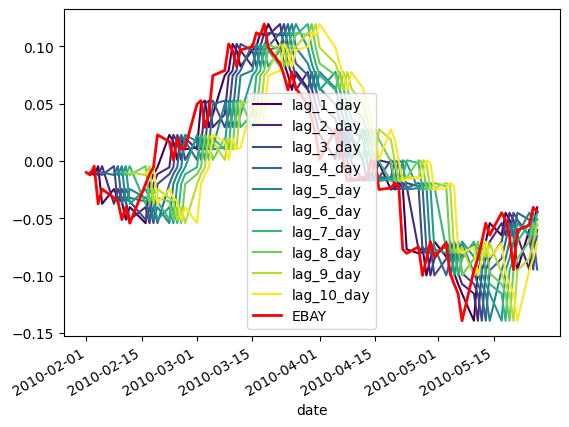

In [76]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc["EBAY"].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc["EBAY"].iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

**Special case: Auto-regressive models**  
Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [77]:
# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(prices_perc_shifted.median())
y = prices_perc["EBAY"].fillna(prices_perc["EBAY"].median())

# Fit the model
model = Ridge()
model.fit(X, y)

# You've filled in the missing values with the median so that it behaves well with scikit-learn. Now let's take a look at what your model found.

Ridge()

**Visualize regression coefficients**  
Now that you've fit the model, let's visualize its coefficients. This is an important part of machine learning because it gives you an idea for how the different features of a model affect the outcome.

The shifted time series DataFrame (prices_perc_shifted) and the regression model (model) are available in your workspace.

In this exercise, you will create a function that, given a set of coefficients and feature names, visualizes the coefficient values.

In [78]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

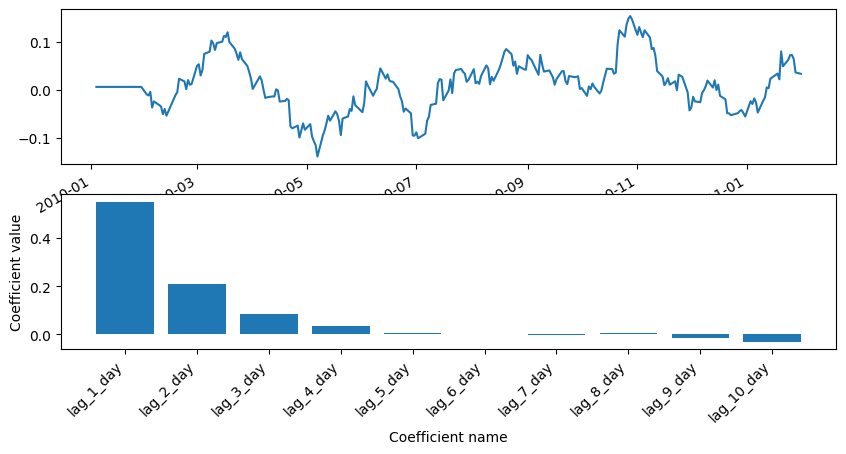

In [79]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

# When you use time-lagged features on the raw data, you see that the highest coefficient by far is the first one.
# This means that the N-1th time point is useful in predicting the Nth timepoint, but no other points are useful.

**Auto-regression with a smoother time series**   
Now, let's re-run the same procedure using a smoother signal. You'll use the same percent change algorithm as before, but this time use a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints gets smaller, resulting in a smoother signal. What do you think this will do to the auto-regressive model?

prices_perc_shifted and model (updated to use a window of 40) are available in your workspace.



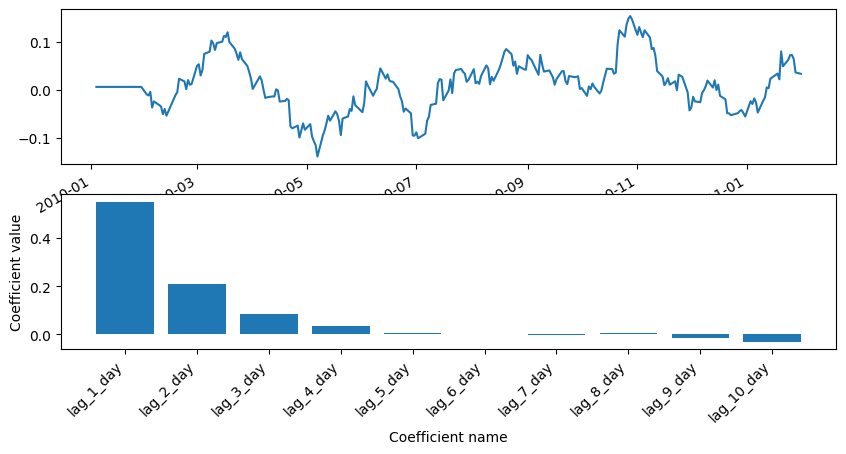

In [80]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

# As you can see here, by transforming your data with a larger window,
# you've also changed the relationship between each timepoint and the ones that come just before it.
# This model's coefficients gradually go down to zero, which means that the signal itself is smoother over time. \
# Be careful when you see something like this, as it means your data is not i.i.d.

### Cross-validating time series data

**Cross-validation with shuffling**   
As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

An instance of the Linear regression object (model) is available in your workspace along with the function r2_score() for scoring. Also, the data is stored in arrays X and y. We've also provided a helper function (visualize_predictions()) to help visualize the results.

In [81]:
def visualize_predictions(results):
        fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

        # Loop through our model results to visualize them
        for ii, (prediction, score, indices) in enumerate(results):
            # Plot the predictions of the model in the order they were generated
            offset = len(prediction) * ii
            axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))

            # Plot the predictions of the model according to how time was ordered
            axs[1].scatter(indices, prediction)
        axs[0].legend(loc="best")
        axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
        axs[1].set(xlabel="Time", title="Predictions ordered by time")
        plt.show()

Cross-validation completed. Results collected.


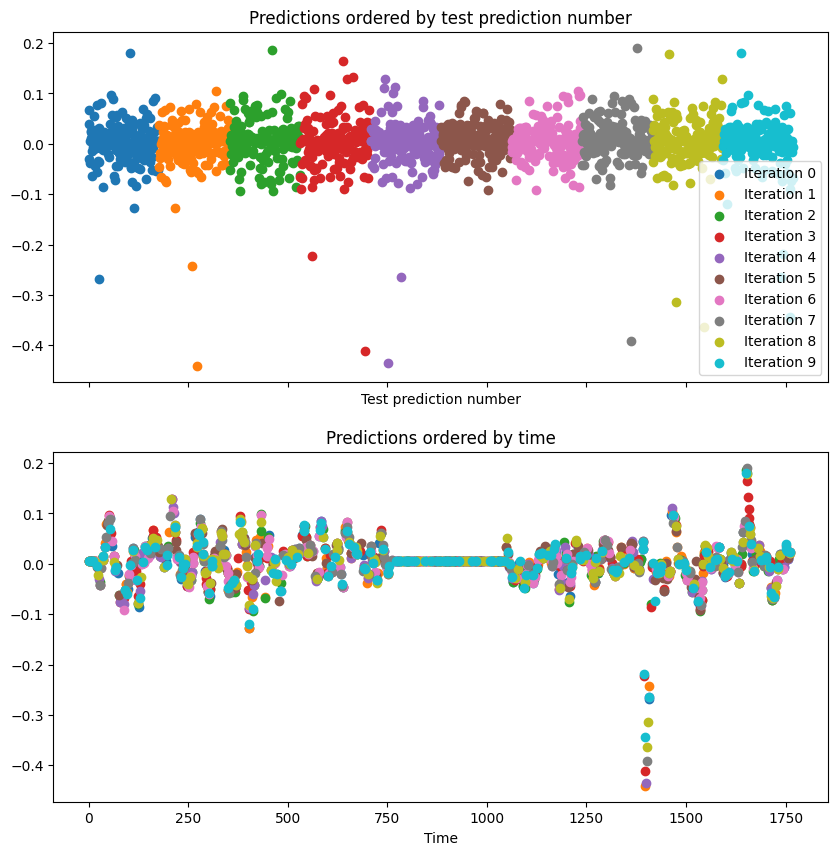

In [82]:
from sklearn.metrics import r2_score
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
# Convert X and y to numpy arrays before splitting
X_values = X.values
y_values = y.values

for tr, tt in cv.split(X_values, y_values):
    model.fit(X_values[tr], y_values[tr])

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X_values[tt])
    score = r2_score(y_values[tt], prediction)
    results.append((prediction, score, tt))

# Custom function to quickly visualize predictions
# Assuming visualize_predictions is defined elsewhere in the notebook
# visualize_predictions(results)
print("Cross-validation completed. Results collected.")
visualize_predictions(results)

# You've correctly constructed and fit the model. If you look at the plot to the right, see that the order of datapoints in the test set is scrambled.
# Let's see how it looks when we shuffle the data in blocks.

**Cross-validation without shuffling**  
Now, re-run your model fit using block cross-validation (without shuffling all datapoints). In this case, neighboring time-points will be kept close to one another. How do you think the model predictions will look in each cross-validation loop?

An instance of the Linear regression model object is available in your workspace. Also, the arrays X and y (training data) are available too.

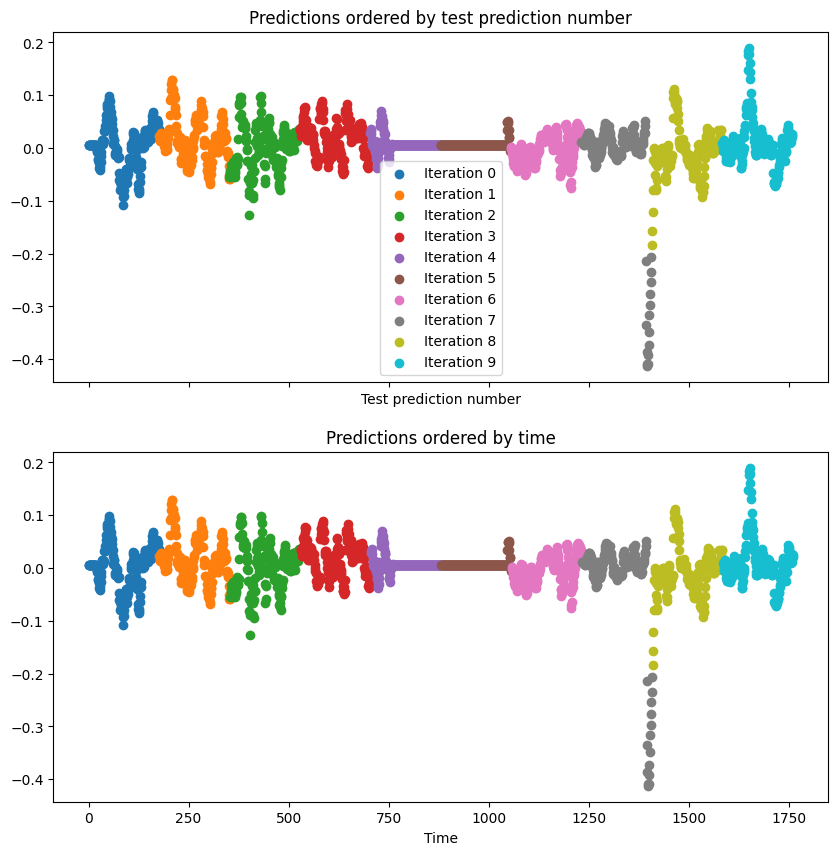

In [83]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X_values, y_values):
    # Fit the model on training data
    model.fit(X_values[tr], y_values[tr])

    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X_values[tt])
    score = r2_score(y_values[tt], prediction) # Calculate the score
    results.append((prediction, score, tt)) # Append prediction, score, and test indices

# Custom function to quickly visualize predictions
visualize_predictions(results)

# This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more like a real time series because you didn't shuffle the data.
# This is a good sanity check to make sure your CV splits are correct.

**Time-based cross-validation**  
Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

An instance of the Linear regression model object is available in your workpsace. Also, the arrays X and y (training data) are available too.

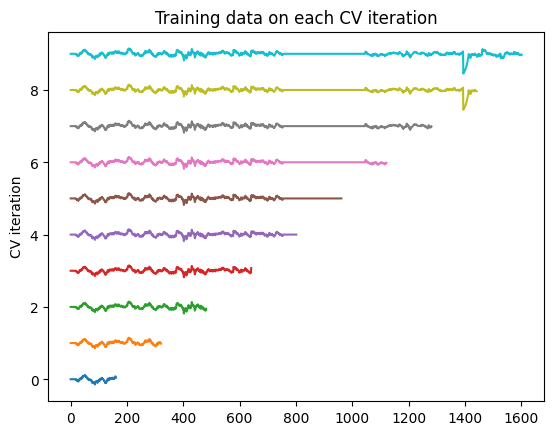

In [84]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X_values, y_values)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y_values[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

# Note that the size of the training set grew each time when you used the time series cross-validation object.
# This way, the time points you predict are always after the timepoints we train on.

### Stationality And Stability

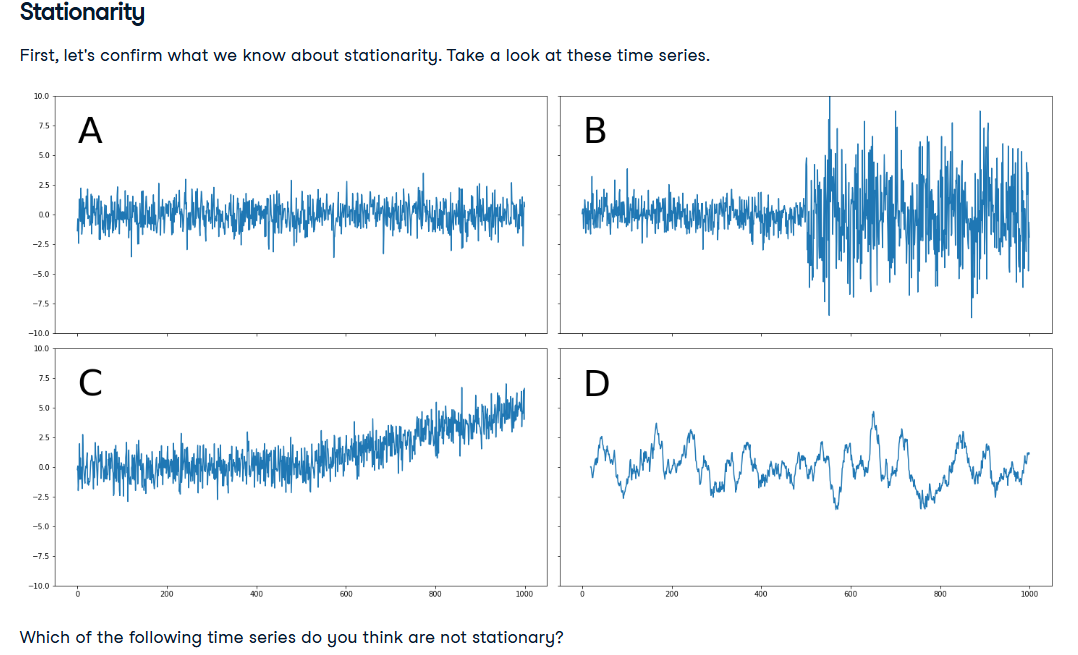

-> B and C

[ C begins to trend upward partway through, while B shows a large increase in variance mid-way through, making both of them non-stationary. ]

 **Bootstrapping a confidence interval**  
A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

In [85]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # If data is a 1D array, reshape it to 2D with a single column
    if data.ndim == 1:
        data = data.reshape(-1, 1)

    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)

    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

    # You can use this function to assess the variability of your model coefficients.

**Calculating variability in model coefficients**  
In this lesson, you'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time. You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.

Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the coefficients are a reflection of the pattern that your model has found in the data.

An instance of the Linear regression object (model) is available in your workpsace. Also, the arrays X and y (the data) are available too.

In [86]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=100)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X_values[tr], y_values[tr])
    coefficients[ii] = model.coef_

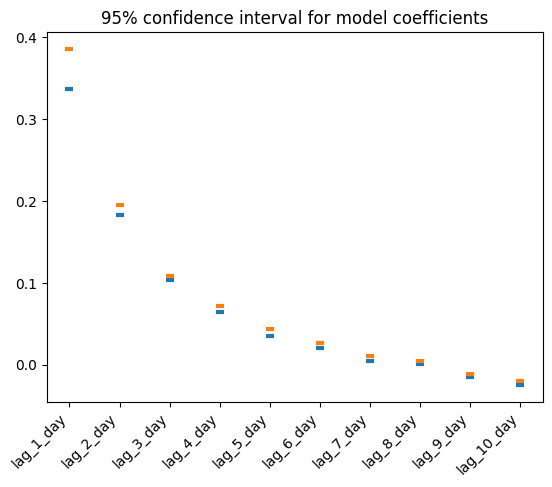

In [87]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Define feature_names from the columns of X
feature_names = X.columns

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# You've calculated the variability around each coefficient, which helps assess which coefficients are more stable over time!

**Visualizing model score variability over time**  
Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the TimeSeriesSplit object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and data in X and y.

In [91]:
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
from sklearn.metrics import make_scorer
from functools import partial

# Define the my_pearsonr function
def my_pearsonr(y_true, y_pred):
    # Calculate Pearson correlation coefficient
    # Add a check for constant input to avoid the warning and return NaN
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        return np.nan
    return pearsonr(y_true, y_pred)[0]

# Create a scorer from the function
pearson_scorer = make_scorer(my_pearsonr)


# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=100)

# Generate scores for each split to see how the model performs over time
# The ConstantInputWarning is expected for some splits where y_true or y_pred is constant.
scores = cross_val_score(model, X, y, cv=cv, scoring=pearson_scorer)

# Get the index of the last element of each test set for times_scores
times_scores = [X.index[tt[-1]] for tr, tt in cv.split(X, y)]


# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
# Use dropna() to handle potential NaNs from constant input warnings
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

# Plot the scores and the confidence intervals
fig, ax = plt.subplots(figsize=(10, 5))
scores_series.plot(ax=ax, label='Score')
scores_lo.plot(ax=ax, label='Lower CI')
scores_hi.plot(ax=ax, label='Upper CI')
ax.set(title='Model Score Variability Over Time', xlabel='Time', ylabel='Score')
ax.legend()
plt.show()

/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr(y_true, y_pred)[0]
/tmp/ipython-input-91-801785909.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return pearsonr

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

**Accounting for non-stationarity**  
In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and the data in X and y.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd

# Example settings
window_sizes = [25, 50, 75, 100]
n_splits = 100

# This should be your actual time index (shortened to match cross_val_score length later)
times_scores = pd.date_range(start='2020-01-01', periods=len(y_values), freq='D')
valid_index = times_scores[-n_splits:]

# Create an empty DataFrame with the valid index
all_scores = pd.DataFrame(index=valid_index)

# Loop through window sizes and compute scores
for window in window_sizes:
    cv = TimeSeriesSplit(n_splits=n_splits, max_train_size=window)

    this_scores = cross_val_score(model, X_values, y_values, cv=cv, scoring=my_pearsonr)

    # Store results with aligned index
    all_scores[f'Length {window}'] = pd.Series(this_scores, index=valid_index)

# Rolling mean to smooth results
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()

# notice how in some stretches of time, longer windows perform worse than shorter ones.
# This is because the statistics in the data have changed, and the longer window is now using outdated information.
